In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/jayanth/Downloads/boston_csv.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [4]:
df=data.drop(["MV"],axis=1)# removal of respond variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


# PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents,
              columns = ['pc1', 'pc2'
                         ,'pc3','pc4'])

In [6]:
principalDf.head()
pca.explained_variance_ratio_

array([0.80582318, 0.16305196, 0.02134861, 0.00695699])

In [8]:
finalDf = pd.concat([principalDf["pc1"],principalDf["pc2"],data["MV"]], axis = 1)
finalDf.head()

,pc1,pc2,MV
0,-119.818842,-5.560052,24.000000
1,-168.890154,10.116212,21.600000
2,-169.311704,14.080543,34.700001
3,-190.230644,18.302456,33.400002
4,-190.133450,16.097951,36.200001


Text(0.5,1,'Component-wise and Cumulative Explained Variance')

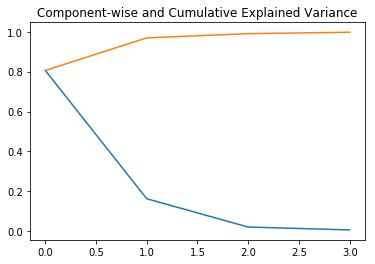

In [11]:
plt.plot(range(4), pca.explained_variance_ratio_,label="Variance-ratio")
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_),label="cumulative variance-ratio")
plt.title("Component-wise and Cumulative Explained Variance")
